# Frequentist Inference Case Study - Part B

## Learning objectives

Welcome to Part B of the Frequentist inference case study! The purpose of this case study is to help you apply the concepts associated with Frequentist inference in Python. In particular, you'll practice writing Python code to apply the following statistical concepts: 
* the _z_-statistic
* the _t_-statistic
* the difference and relationship between the two
* the Central Limit Theorem, including its assumptions and consequences
* how to estimate the population mean and standard deviation from a sample
* the concept of a sampling distribution of a test statistic, particularly for the mean
* how to combine these concepts to calculate a confidence interval

In the previous notebook, we used only data from a known normal distribution. **You'll now tackle real data, rather than simulated data, and answer some relevant real-world business problems using the data.**

## Hospital medical charges

Imagine that a hospital has hired you as their data scientist. An administrator is working on the hospital's business operations plan and needs you to help them answer some business questions. 

In this assignment notebook, you're going to use frequentist statistical inference on a data sample to answer the questions:
* has the hospital's revenue stream fallen below a key threshold?
* are patients with insurance really charged different amounts than those without?

Answering that last question with a frequentist approach makes some assumptions, and requires some knowledge, about the two groups.

We are going to use some data on medical charges obtained from [Kaggle](https://www.kaggle.com/easonlai/sample-insurance-claim-prediction-dataset). 

For the purposes of this exercise, assume the observations are the result of random sampling from our single hospital. Recall that in the previous assignment, we introduced the Central Limit Theorem (CLT), and its consequence that the distributions of sample statistics approach a normal distribution as $n$ increases. The amazing thing about this is that it applies to the sampling distributions of statistics that have been calculated from even highly non-normal distributions of data! Recall, also, that hypothesis testing is very much based on making inferences about such sample statistics. You're going to rely heavily on the CLT to apply frequentist (parametric) tests to answer the questions in this notebook.

In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as s
from numpy.random import seed
medical = pd.read_csv('insurance2.csv')

In [2]:
medical.shape

(1338, 8)

In [7]:
medical.head()

,age,sex,bmi,children,smoker,region,charges,insuranceclaim
0,19,0,27.900,0,1,3,16884.92400,1
1,18,1,33.770,1,0,2,1725.55230,1
2,28,1,33.000,3,0,2,4449.46200,0
3,33,1,22.705,0,0,1,21984.47061,0
4,32,1,28.880,0,0,1,3866.85520,1


__Q1:__ Plot the histogram of charges and calculate the mean and standard deviation. Comment on the appropriateness of these statistics for the data.

__A:__

(array([208., 174., 154., 140., 139., 119.,  55.,  32.,  42.,  36.,  23.,
         27.,  16.,  16.,   3.,  15.,  22.,  22.,  22.,  19.,  16.,  14.,
         16.,   2.,   1.,   1.,   0.,   1.,   1.,   2.]),
 array([ 1121.8739  ,  3210.159037,  5298.444174,  7386.729311,
         9475.014448, 11563.299585, 13651.584722, 15739.869859,
        17828.154996, 19916.440133, 22004.72527 , 24093.010407,
        26181.295544, 28269.580681, 30357.865818, 32446.150955,
        34534.436092, 36622.721229, 38711.006366, 40799.291503,
        42887.57664 , 44975.861777, 47064.146914, 49152.432051,
        51240.717188, 53329.002325, 55417.287462, 57505.572599,
        59593.857736, 61682.142873, 63770.42801 ]),
 <a list of 30 Patch objects>)

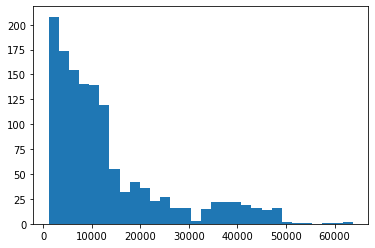

In [8]:
plt.hist(medical['charges'], bins=30)

In [2]:
charges_mean = np.mean(medical['charges'])
charges_mean

13270.422265141257

In [3]:
charges_std = np.std(medical['charges'])
charges_std

12105.484975561605

We see that the standard deviation of charges is almost equal to the mean value of charges, indicating that, on average, charges are bound to be far away from the mean value. This shows that there is a wide range of possible values that charges can take on. Since we do not know what procedures the patients are undertaking in the hospital, it makes sense that there is a wide range of charges possible.

__Q2:__ The administrator is concerned that the actual average charge has fallen below 12,000, threatening the hospital's operational model. On the assumption that these data represent a random sample of charges, how would you justify that these data allow you to answer that question? And what would be the most appropriate frequentist test, of the ones discussed so far, to apply?

__A:__ We can do a t-test to determine if the population mean is below 12000. I can use the sampling distribution to answer the question, since I have a sample size > 30 and a sample that is random (and I'm assuming representative of the total hospital charges to patients). 

Using the CLT, we can probably use a z-value to create confidence intervals as well (since sample size > 30 and sample is randomly selected), but as we observed in the previous part of the exercise, confidence intervals created with t-values are wider than those created with z-values, and I imagine that ensuring means below 12000 are not in this wider interval would give the administrator more comfort.

__Q3:__ Given the nature of the administrator's concern, what is the appropriate confidence interval in this case? A ***one-sided*** or ***two-sided*** interval? (Refresh your understanding of this concept on p. 399 of the *AoS*). Calculate the critical value and the relevant 95% confidence interval for the mean, and comment on whether the administrator should be concerned.

__A:__ I would say that the appropriate confidence interval in this case is a 95% one-sided confidence interval, since all we want to make sure is that the population mean is equal to or greater than 12000.

H0 (null hyp) - pop mean = 12000

Ha (alt hyp) - pop mean > 12000

In [13]:
alpha = (1-0.95)/2
alpha

0.025000000000000022

In [14]:
df = 1338 - 1
df

1337

In [15]:
moe = 1.646 * charges_std/np.sqrt(1338)
moe

544.7333530894142

In [16]:
print("Hence, 95% confidence interval is {} +/- {}".format(charges_mean, moe))

Hence, 95% confidence interval is 13270.422265141257 +/- 544.7333530894142


We see that this interval's minimum is greater than 12000, indicating that if 1338 patients were sampled (from total patients in the hospital) many times, the average charge would lie in this interval 95% of the time. Hence, I do not think the administrator has anything to worry about.

The administrator then wants to know whether people with insurance really are charged a different amount to those without.

__Q4:__ State the null and alternative hypothesis here. Use the _t_-test for the difference between means, where the pooled standard deviation of the two groups is given by:
\begin{equation}
s_p = \sqrt{\frac{(n_0 - 1)s^2_0 + (n_1 - 1)s^2_1}{n_0 + n_1 - 2}}
\end{equation}

and the *t*-test statistic is then given by:

\begin{equation}
t = \frac{\bar{x}_0 - \bar{x}_1}{s_p \sqrt{1/n_0 + 1/n_1}}.
\end{equation}

(If you need some reminding of the general definition of ***t-statistic***, check out the definition on p. 404 of *AoS*). 

What assumption about the variances of the two groups are we making here?

__A:__ H0 (null hyp) - people with insurance and without insurance are charged the same amount

Ha (alt hyp) - people with insurance and without insurance are charged different amounts

This requires a two-tailed t-test.

__Q5:__ Perform this hypothesis test both manually, using the above formulae, and then using the appropriate function from [scipy.stats](https://docs.scipy.org/doc/scipy/reference/stats.html#statistical-tests) (hint, you're looking for a function to perform a _t_-test on two independent samples). For the manual approach, calculate the value of the test statistic and then its probability (the p-value). Verify you get the same results from both.

__A:__ 

In [10]:
ins = medical[medical.insuranceclaim == 1]
no_ins = medical[medical.insuranceclaim == 0]

In [12]:
n_ins = len(ins)
n_no_ins = len(no_ins)
mean_ins = np.mean(ins.charges)
mean_no_ins = np.mean(no_ins.charges)
std_ins = np.std(ins.charges)
std_no_ins = np.std(no_ins.charges)

In [16]:
s.ttest_ind_from_stats(mean_ins, std_ins, n_ins, mean_no_ins, std_no_ins, n_no_ins)

Ttest_indResult(statistic=11.901306943555387, pvalue=4.090550214373679e-31)

In [17]:
sp = np.sqrt(((n_ins-1)*std_ins**2 + (n_no_ins-1)*std_no_ins**2)/(n_ins + n_no_ins - 2))

In [18]:
t = (mean_ins - mean_no_ins)/(sp*np.sqrt((1/n_ins)+(1/n_no_ins)))

In [19]:
t

11.901306943555385

Congratulations! Hopefully you got the exact same numerical results. This shows that you correctly calculated the numbers by hand. Secondly, you used the correct function and saw that it's much easier to use. All you need to do is pass your data to it.

__Q6:__ Conceptual question: look through the documentation for statistical test functions in scipy.stats. You'll see the above _t_-test for a sample, but can you see an equivalent one for performing a *z*-test from a sample? Comment on your answer.

__A:__ scipy.stats.zscore(sample) gives us a function to procure a z-score from a sample.

## Learning outcomes

Having completed this project notebook, you now have good hands-on experience:
* using the central limit theorem to help you apply frequentist techniques to answer questions that pertain to very non-normally distributed data from the real world
* performing inference using such data to answer business questions
* forming a hypothesis and framing the null and alternative hypotheses
* testing this using a _t_-test